# ***PERSONALITY***

https://www.kaggle.com/arslanali4343/top-personality-dataset

In [1]:
# modules we'll use
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# save filepath to variable for easier access
personality_file_path = '/content/2018-personality-data.csv'
# read the data and store data in DataFrame titled personality_data
personality_data = pd.read_csv(personality_file_path) 

# **basic data exploration**

In [3]:
# display the first lines of the dataframe
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3


In [4]:
# print the data type of each feature within the dataframe 
personality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   userid                1834 non-null   object 
 1    openness             1834 non-null   float64
 2    agreeableness        1834 non-null   float64
 3    emotional_stability  1834 non-null   float64
 4    conscientiousness    1834 non-null   float64
 5    extraversion         1834 non-null   float64
 6    assigned metric      1834 non-null   object 
 7    assigned condition   1834 non-null   object 
 8    movie_1              1834 non-null   int64  
 9    predicted_rating_1   1834 non-null   float64
 10   movie_2              1834 non-null   int64  
 11   predicted_rating_2   1834 non-null   float64
 12   movie_3              1834 non-null   int64  
 13   predicted_rating_3   1834 non-null   float64
 14   movie_4              1834 non-null   int64  
 15   predicted_rating_4  

In [5]:
# print a summary of the data in Personality data
personality_data.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,4.310485,49927.826063,4.302079,47616.419847,4.299958,43602.852236,4.300766,42005.860960,4.297656,41146.596510,4.296113,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,0.389661,46546.840789,0.383807,45936.397132,0.380832,44956.663214,0.373970,44992.309865,0.375688,44318.996536,0.377126,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,2.334397,1.000000,2.446774,6.000000,2.606057,1.000000,2.378735,1.000000,2.401339,6.000000,2.320503,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,4.059875,2918.000000,4.043363,2423.250000,4.042813,2020.500000,4.053204,2019.000000,4.051777,2283.500000,4.041609,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,4.308237,44197.000000,4.297630,33779.000000,4.298478,26614.000000,4.296220,8364.000000,4.295978,7767.000000,4.287963,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,4.572351,95604.000000,4.549842,93006.000000,4.559509,88531.000000,4.545660,86528.000000,4.545643,85774.000000,4.552859,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,6.437737,140265.000000,7.216901,135567.000000,6.370870,142871.000000,6.064117,139855.000000,6.331396,134853.000000,6.288501,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


# **improving the data set**

In [6]:
# rename axis
personality_data.rename_axis("users", axis='rows').rename_axis("information", axis='columns')

information,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
users,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,95858,4.271995,115713,4.611922,26674,4.459407,93040,4.147292,117533,4.098206,108979,4.064843,112582,4.149100,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,1247,4.266540,953,4.211322,2010,4.408341,1234,4.090358,5291,4.202424,106642,4.113912,1209,4.094422,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,77658,4.710444,101895,5.029360,1260,4.698602,5971,4.660769,98491,4.962319,926,4.706864,1204,4.645191,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,2843,4.456451,3629,4.668444,3022,4.676067,3307,4.530360,1211,4.292660,3462,4.341634,5291,4.261166,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,cff910b71f09b3120289ff6b461a9e03,5.5,3.5,2.5,4.0,5.5,popularity,low,108979,4.246346,33779,4.002232,96728,3.981009,77307,4.059373,111759,3.888507,7762,4.368495,26082,4.554531,89753,4.145526,6643,4.409108,115122,3.960470,7700,4.178546,67997,4.085300,3,3
1830,1ab3a4c2921d8da640854819b0f6cfce,4.0,3.5,4.5,4.0,2.5,serendipity,high,93040,4.227140,1199,4.069527,83134,4.336292,5971,4.091813,68237,4.217929,745,4.101192,4973,4.244278,47099,4.473696,5618,4.149697,903,4.116152,38061,4.155210,1197,4.045751,3,4
1831,a06386edadf3bc614dadb7044708c46c,6.0,3.0,5.5,3.5,6.0,serendipity,low,106173,3.935297,126397,4.006561,109710,3.947412,99171,4.003978,119194,4.002666,69483,4.235115,45691,4.191760,58530,3.965657,26519,3.998642,89707,4.144870,2571,3.860041,108709,3.899857,3,4


In [7]:
# delete escapes from the columns names
personality_data.columns=personality_data.columns.str.strip()

In [8]:
personality_data.columns

Index(['userid', 'openness', 'agreeableness', 'emotional_stability',
       'conscientiousness', 'extraversion', 'assigned metric',
       'assigned condition', 'movie_1', 'predicted_rating_1', 'movie_2',
       'predicted_rating_2', 'movie_3', 'predicted_rating_3', 'movie_4',
       'predicted_rating_4', 'movie_5', 'predicted_rating_5', 'movie_6',
       'predicted_rating_6', 'movie_7', 'predicted_rating_7', 'movie_8',
       'predicted_rating_8', 'movie_9', 'predicted_rating_9', 'movie_10',
       'predicted_rating_10', 'movie_11', 'predicted_rating_11', 'movie_12',
       'predicted_rating_12', 'is_personalized', 'enjoy_watching'],
      dtype='object')

# **data cleaning**

*handling missing values*



In [9]:
# detect the null values
print(personality_data.head().isnull())
personality_data.isnull().sum()

   userid  openness  ...  is_personalized  enjoy_watching
0   False     False  ...            False           False
1   False     False  ...            False           False
2   False     False  ...            False           False
3   False     False  ...            False           False
4   False     False  ...            False           False

[5 rows x 34 columns]


userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

In [10]:
# our data already does not have any null values
personality_data.isnull().sum().sum()

0

*preprocessing numerical data*

In [11]:
# round the predicted ratings values
col=['predicted_rating_1','predicted_rating_2','predicted_rating_3','predicted_rating_4','predicted_rating_5','predicted_rating_6','predicted_rating_7','predicted_rating_8','predicted_rating_9','predicted_rating_10','predicted_rating_11','predicted_rating_12']
personality_data[col]=personality_data[col].round(decimals=1)

In [12]:
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.4,95858,4.3,115713,4.6,26674,4.5,93040,4.1,117533,4.1,108979,4.1,112582,4.1,120138,4.2,121372,4.4,127152,4.1,95311,4.1,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.2,1247,4.3,953,4.2,2010,4.4,1234,4.1,5291,4.2,106642,4.1,1209,4.1,56782,4.0,5618,4.0,969,4.2,1232,4.3,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.9,77658,4.7,101895,5.0,1260,4.7,5971,4.7,98491,5.0,926,4.7,1204,4.6,2288,4.8,3307,4.7,1172,4.6,1212,4.7,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,2,3


*preprocessing categorical data*

In [13]:
# get all the unique values in the 'assigned metric' column
preferences = personality_data['assigned metric'].unique()

# sort them alphabetically and then take a closer look
preferences.sort()
preferences

array([' all', ' diversity', ' popularity', ' serendipity'], dtype=object)

In [14]:
# remove spaces
personality_data['assigned metric']=personality_data['assigned metric'].str.strip()

In [15]:
# replace 'all' by 'default'
dict = {"all":"default"}
personality_data['assigned metric'].replace(dict, inplace=True)

In [16]:
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.4,95858,4.3,115713,4.6,26674,4.5,93040,4.1,117533,4.1,108979,4.1,112582,4.1,120138,4.2,121372,4.4,127152,4.1,95311,4.1,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,default,default,94959,4.2,1247,4.3,953,4.2,2010,4.4,1234,4.1,5291,4.2,106642,4.1,1209,4.1,56782,4.0,5618,4.0,969,4.2,1232,4.3,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.9,77658,4.7,101895,5.0,1260,4.7,5971,4.7,98491,5.0,926,4.7,1204,4.6,2288,4.8,3307,4.7,1172,4.6,1212,4.7,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,2,3


In [17]:
# get all the unique values in the 'assigned condition' column
preferences_ = personality_data['assigned condition'].unique()

# sort them alphabetically and then take a closer look
preferences_.sort()
preferences_

array([' default', ' high', ' low', ' medium'], dtype=object)

In [18]:
# remove spaces
personality_data['assigned condition']=personality_data['assigned condition'].str.strip()

In [19]:
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.4,95858,4.3,115713,4.6,26674,4.5,93040,4.1,117533,4.1,108979,4.1,112582,4.1,120138,4.2,121372,4.4,127152,4.1,95311,4.1,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,default,default,94959,4.2,1247,4.3,953,4.2,2010,4.4,1234,4.1,5291,4.2,106642,4.1,1209,4.1,56782,4.0,5618,4.0,969,4.2,1232,4.3,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.9,77658,4.7,101895,5.0,1260,4.7,5971,4.7,98491,5.0,926,4.7,1204,4.6,2288,4.8,3307,4.7,1172,4.6,1212,4.7,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,2,3


# **feature transformation**

In [20]:
# transform the 'assigned metric' values to numerical data
personality_data['assigned metric'] = personality_data['assigned metric'].replace({'default': 1, 'diversity': 2, 'popularity': 3, 'serendipity': 4})

In [21]:
# transform the 'assigned condition' values to numerical data
personality_data['assigned condition'] = personality_data['assigned condition'].replace({'default': 1, 'high': 2, 'low': 3, 'medium': 4})

In [22]:
# transform the 'userid' values to numerical data
encoder=LabelEncoder()
personality_data['userid']=encoder.fit_transform(personality_data['userid'])

In [23]:
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,1006,5.0,2.0,3.0,2.5,6.5,4,2,77658,4.4,95858,4.3,115713,4.6,26674,4.5,93040,4.1,117533,4.1,108979,4.1,112582,4.1,120138,4.2,121372,4.4,127152,4.1,95311,4.1,4,4
1,836,7.0,4.0,6.0,5.5,4.0,1,1,94959,4.2,1247,4.3,953,4.2,2010,4.4,1234,4.1,5291,4.2,106642,4.1,1209,4.1,56782,4.0,5618,4.0,969,4.2,1232,4.3,2,3
2,1302,4.0,3.0,4.5,2.0,2.5,4,4,110501,4.9,77658,4.7,101895,5.0,1260,4.7,5971,4.7,98491,5.0,926,4.7,1204,4.6,2288,4.8,3307,4.7,1172,4.6,1212,4.7,2,2
3,1042,5.5,5.5,4.0,4.5,4.0,3,4,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,3,3
4,18,5.5,5.5,3.5,4.5,2.5,3,4,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,2,3


# **general data vizualization**

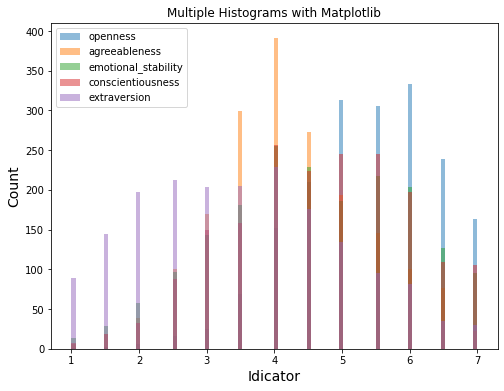

In [24]:
# histogram: personality items
plt.figure(figsize=(8,6))
plt.hist(personality_data['openness'], bins=100, alpha=0.5, label="openness")
plt.hist(personality_data['agreeableness'], bins=100, alpha=0.5, label="agreeableness")
plt.hist(personality_data['emotional_stability'], bins=100, alpha=0.5, label="emotional_stability")
plt.hist(personality_data['conscientiousness'], bins=100, alpha=0.5, label="conscientiousness")
plt.hist(personality_data['extraversion'], bins=100, alpha=0.5, label="extraversion")
plt.xlabel("Idicator", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper left')

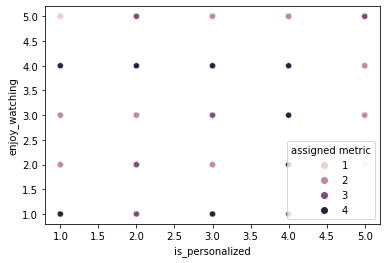

In [25]:
# scatter plot: relation between "is_personalized" and "enjoy_watching" and "assigned metric"
sns.scatterplot(x=personality_data['is_personalized'], y=personality_data['enjoy_watching'], hue=personality_data['assigned metric'], )

In [26]:
S=personality_data['assigned condition'].value_counts()
print(S)

2    554
4    538
3    534
1    208
Name: assigned condition, dtype: int64


In [27]:
lst=S.tolist()
print(lst)

[554, 538, 534, 208]


In [28]:
L=['high','medium','low','default']

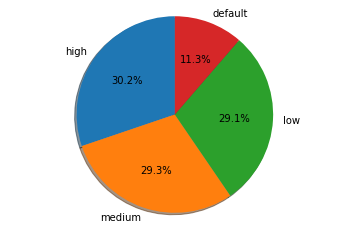

In [29]:
# pie chart of 'assigned condition' using matplotlib
fig1, ax1 = plt.subplots()
ax1.pie(lst, labels=L, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# **clustering**

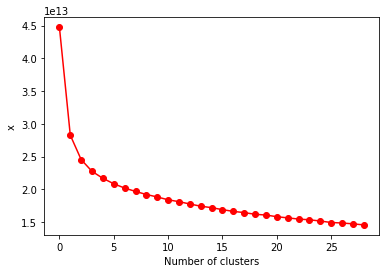

In [30]:
# elbow method
x = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict(personality_data)
    x.append( kmeans.inertia_ )
    
plt.plot( x, 'ro-', label="WCSS")
plt.xlabel("Number of clusters")
plt.ylabel("x")
plt.show()

In [31]:
# k-means method: selecting the features 'openness',	'agreeableness',	'emotional_stability',	'conscientiousness',	'extraversion'
best_cols = ['openness',	'agreeableness',	'emotional_stability',	'conscientiousness',	'extraversion']
kmeans = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
best_vals = personality_data[best_cols].iloc[ :, 1:].values
y_pred = kmeans.fit_predict( best_vals )

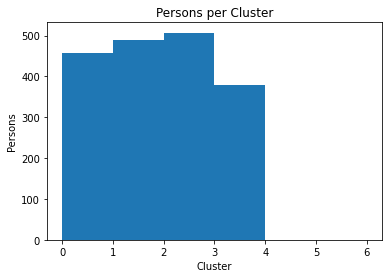

In [32]:
# plotting the number of persons per cluster
plt.hist(y_pred, bins=range(7))
plt.title('Persons per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Persons')
plt.show()

In [33]:
# adding a column containing the clusters to the daraframe
personality_data["cluster"] = y_pred

In [34]:
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,predicted_rating_3,movie_4,predicted_rating_4,movie_5,predicted_rating_5,movie_6,predicted_rating_6,movie_7,predicted_rating_7,movie_8,predicted_rating_8,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching,cluster
0,1006,5.0,2.0,3.0,2.5,6.5,4,2,77658,4.4,95858,4.3,115713,4.6,26674,4.5,93040,4.1,117533,4.1,108979,4.1,112582,4.1,120138,4.2,121372,4.4,127152,4.1,95311,4.1,4,4,0
1,836,7.0,4.0,6.0,5.5,4.0,1,1,94959,4.2,1247,4.3,953,4.2,2010,4.4,1234,4.1,5291,4.2,106642,4.1,1209,4.1,56782,4.0,5618,4.0,969,4.2,1232,4.3,2,3,3
2,1302,4.0,3.0,4.5,2.0,2.5,4,4,110501,4.9,77658,4.7,101895,5.0,1260,4.7,5971,4.7,98491,5.0,926,4.7,1204,4.6,2288,4.8,3307,4.7,1172,4.6,1212,4.7,2,2,2
3,1042,5.5,5.5,4.0,4.5,4.0,3,4,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,3,3,0
4,18,5.5,5.5,3.5,4.5,2.5,3,4,2905,4.5,2843,4.5,3629,4.7,3022,4.7,3307,4.5,1211,4.3,3462,4.3,5291,4.3,3030,4.4,1281,4.5,940,4.4,905,4.3,2,3,2


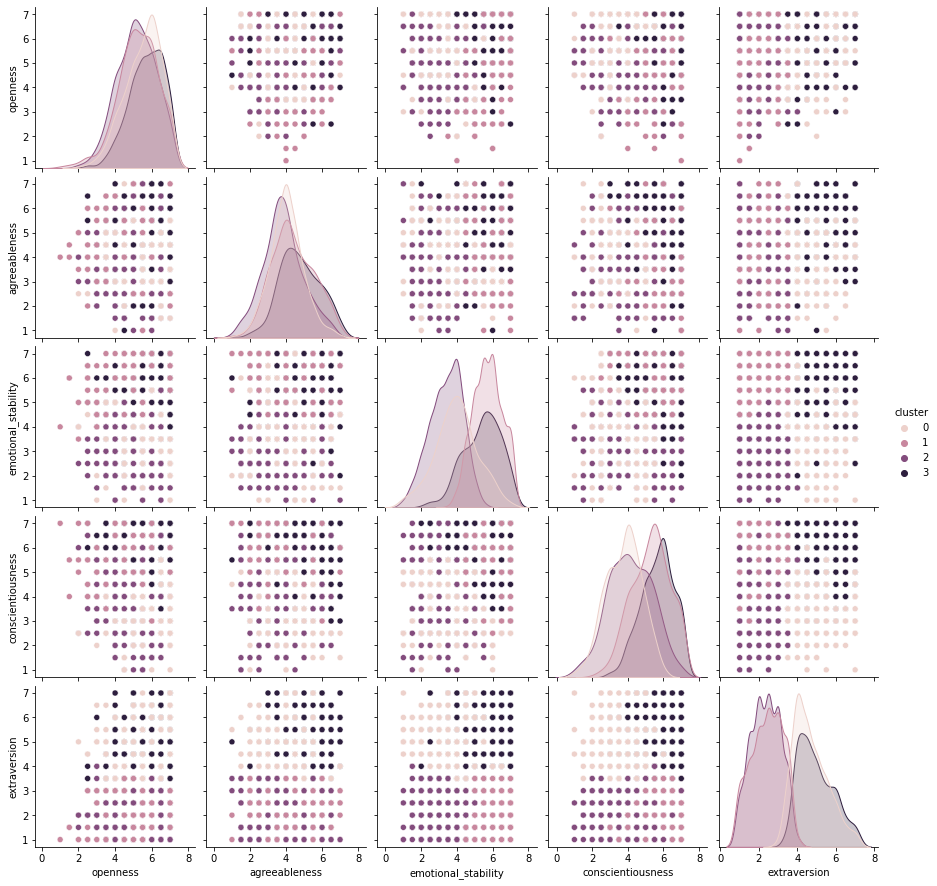

In [35]:
best_cols.append("cluster")
sns.pairplot( personality_data[ best_cols ], hue="cluster")

In [36]:
# table containing the interpretations of the graphs
dicti={"criteria": ['openness',	'agreeableness',	'emotional_stability',	'conscientiousness',	'extraversion', 'TEMPERAMENTS'],
       "explanation": ['new experience', 'cooperative', 'no stress', 'organized', 'outgoing', ' four fundamental personality types'],
       "cluster 0": ['-' , '-' , 'high' , 'high' , 'low', 'PHLEGMATIC'],
       "cluster 1": ['high' , '-' , 'low' , 'low' , 'high', 'CHOLERIC'],
       "cluster 2": ['high' , 'high' , 'high' , 'high' , 'high', 'SANGUINE'],
       "cluster 3": ['-' , 'low' , 'low' , '-' , 'low', 'MELANCHOLIC']
       }
df=pd.DataFrame(dicti)

In [37]:
df

,criteria,explanation,cluster 0,cluster 1,cluster 2,cluster 3
0,openness,new experience,-,high,high,-
1,agreeableness,cooperative,-,-,high,low
2,emotional_stability,no stress,high,low,high,low
3,conscientiousness,organized,high,low,high,-
4,extraversion,outgoing,low,high,high,low
5,TEMPERAMENTS,four fundamental personality types,PHLEGMATIC,CHOLERIC,SANGUINE,MELANCHOLIC


interpretation results: four fundamental personality types: THE FOUR TEMPERAMENTS

An individual could be any combination of the following four types.

Cluster 0: Phlegmatic individuals: tend to be relaxed, peaceful, quiet, and easy-going. They are sympathetic and care about others, yet they try to hide their emotions. Phlegmatic individuals are also good at generalising ideas or problems to the world and making compromises.

Cluster 1: Choleric individuals: tend to be more extroverted. They are described as independent, decisive, goal-oriented, and ambitious. These combined with their dominant, result-oriented outlook make them natural leaders. In Greek, Medieval, and Renaissance thought, they were also violent, vengeful, and short-tempered.

Cluster 2: Sanguine personality type: is described primarily as being highly talkative, enthusiastic, active, and social. Sanguines tend to be more extroverted and enjoy being part of a crowd; they find that being social, outgoing, and charismatic is easy to accomplish. Individuals with this personality have a hard time doing nothing and engage in more risk seeking behavior.

Cluster 3: Melancholic individuals: tend to be analytical and detail-oriented, and they are deep thinkers and feelers. They are introverted and try to avoid being singled out in a crowd. A melancholic personality leads to self-reliant individuals who are thoughtful, reserved, and often anxious. They often strive for perfection within themselves and their surroundings, which leads to tidy and detail-oriented behavior.



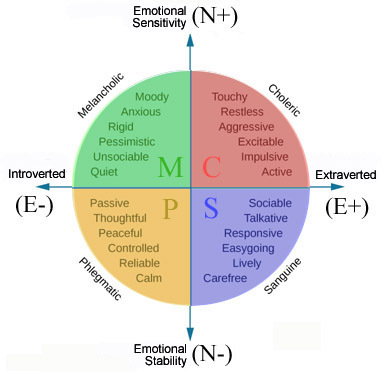

In [38]:
X= np.asarray(personality_data)

In [39]:
kmean= KMeans(4)
kmean.fit(X)
labels=kmean.labels_

In [40]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(1834, 2)

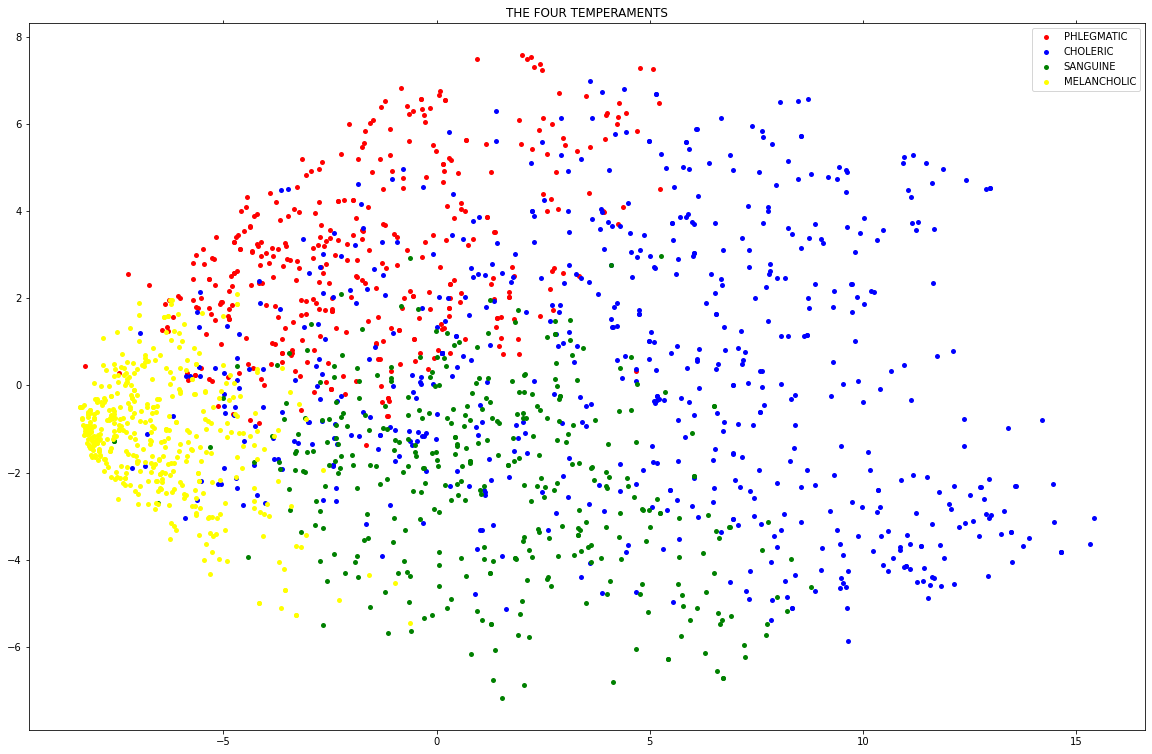

In [41]:
x, y = X_PCA[:, 0], X_PCA[:, 1]


colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow'}

names = {0: 'PHLEGMATIC', 
         1: 'CHOLERIC', 
         2: 'SANGUINE', 
         3: 'MELANCHOLIC'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("THE FOUR TEMPERAMENTS")
plt.show()

# **data visualization: correlation**

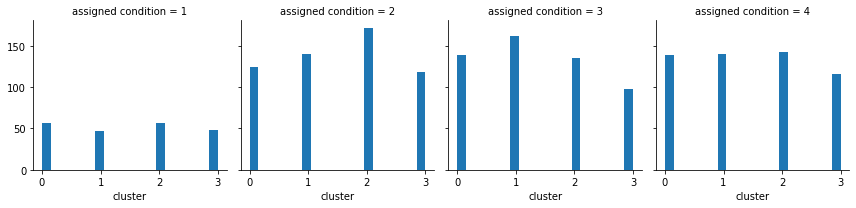

In [42]:
# correlation between assigned condition and cluster
grid = sns.FacetGrid(personality_data, col="assigned condition")
grid.map(plt.hist, "cluster", bins=20)

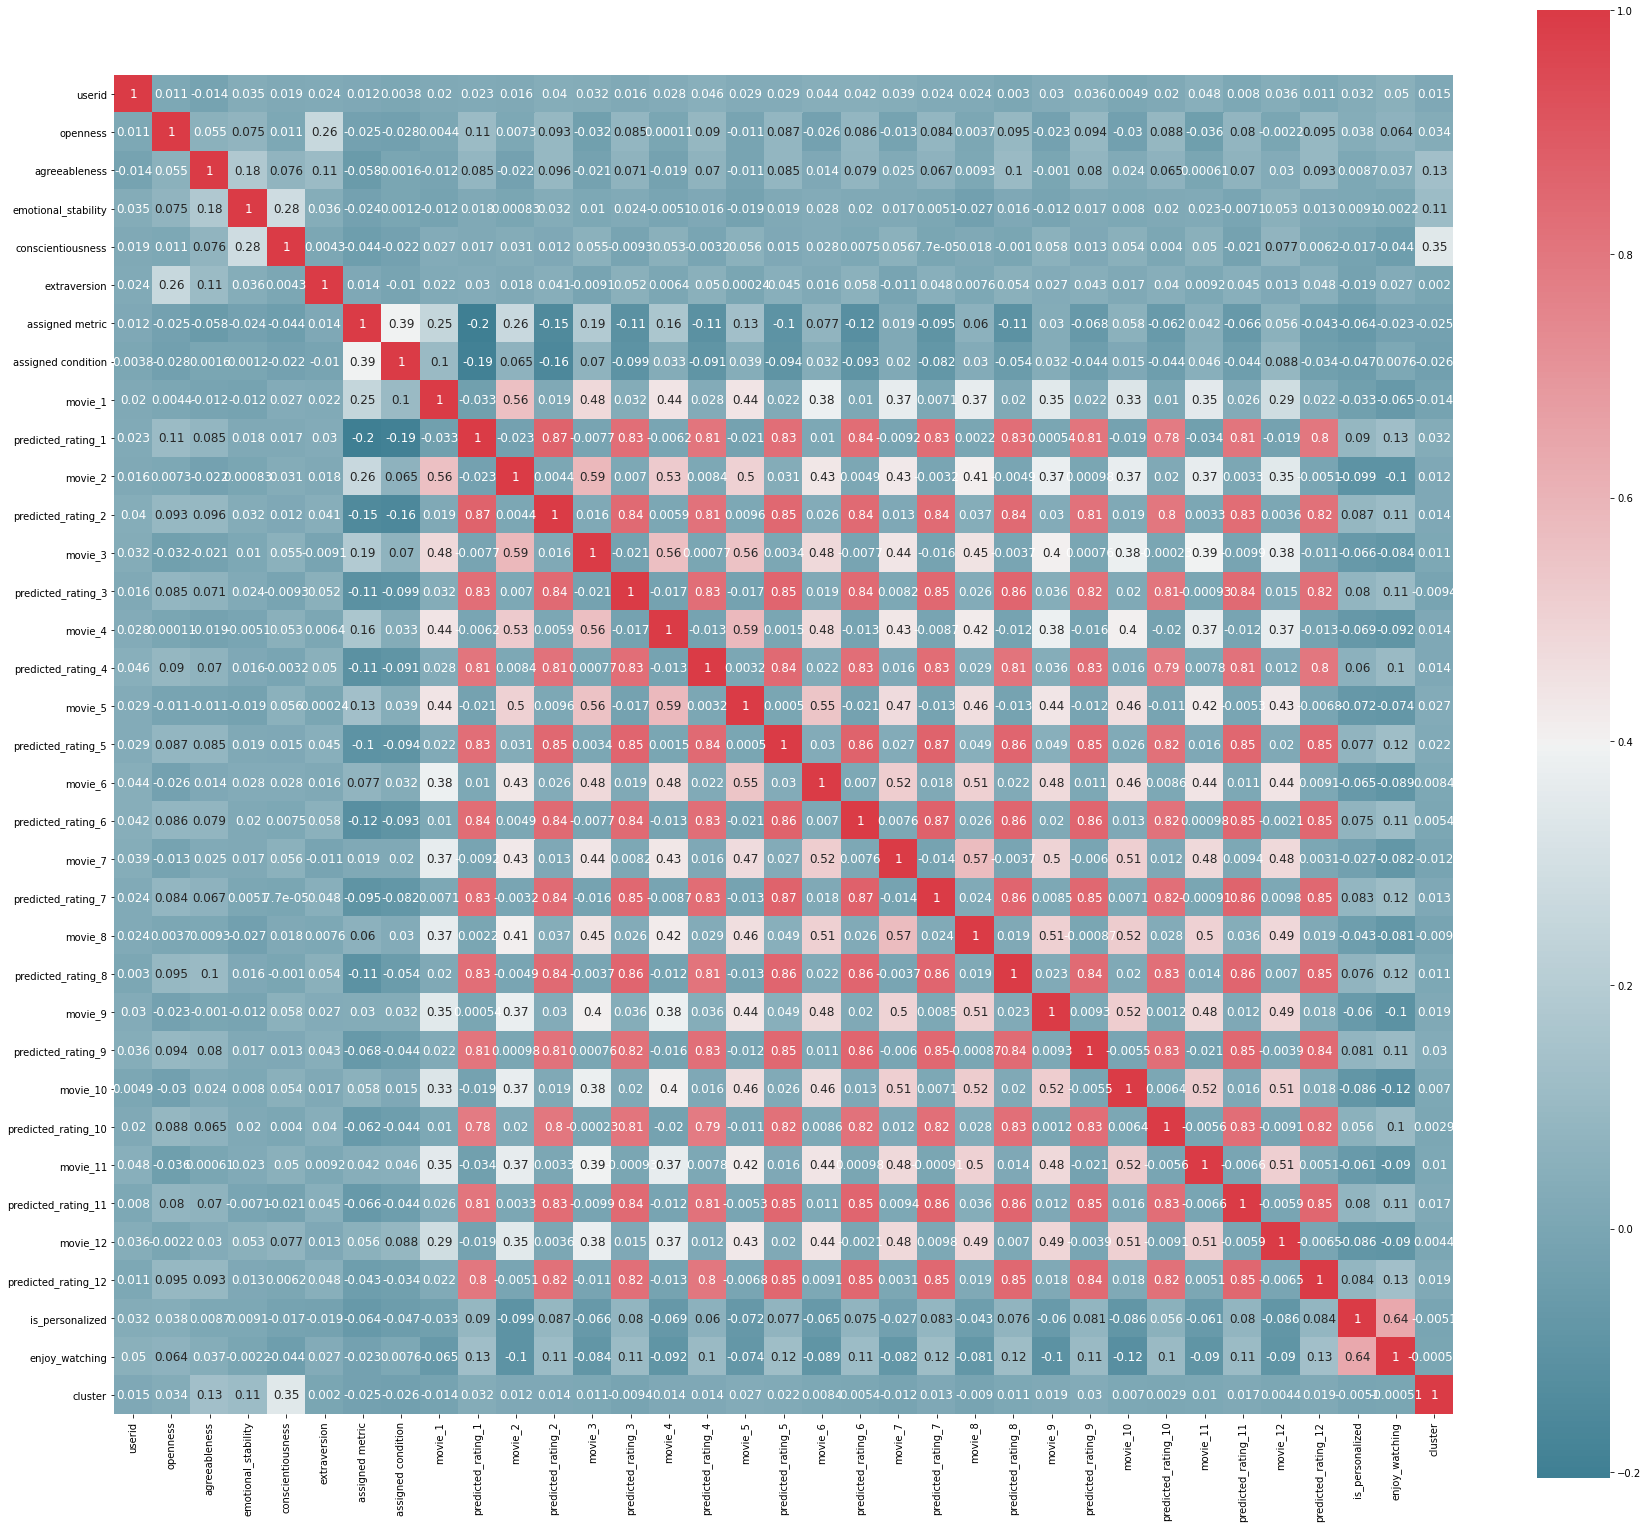

In [43]:
# correlation map
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 30 , 30 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(personality_data)

# **KNN method**

In [44]:
#Choosing the features as x and the target as y
x=personality_data[['openness',	'agreeableness',	'emotional_stability',	'conscientiousness',	'extraversion','assigned metric', 'assigned condition']]
y=personality_data['cluster']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 0.9100817438692098


# **decision tree**

In [45]:
tree_ = tree.DecisionTreeClassifier(criterion = 'gini', splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth = 5)
tree_.fit(x_train, y_train)
tree_.score(x_test, y_test)

0.7002724795640327

# **random forest**

In [46]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9373297002724795

# **K Fold Cross Validation**

In [47]:
scores=cross_val_score(clf, x, y, cv=5)
print("accuracy on each fold/subset :", scores)
print("the average accuracy is", sum(scores)/5)

accuracy on each fold/subset : [0.95367847 0.9373297  0.92643052 0.9400545  0.92349727]
the average accuracy is 0.9361980911540926


conclusion : we decide to choose the random forest with a normal splitting as a model as it returns the best score

# *Experimentation*

In [49]:
l=[]
f_list=['openness',	'agreeableness',	'emotional_stability',	'conscientiousness',	'extraversion','assigned metric', 'assigned condition']
for i in range(len(f_list)):
  if i <= 4:
    print('Enter a score between 1 and 7 for {}: '.format(f_list[i]))
    while True:
      try:
        f=float(input())
        assert f<=7 and f>=1
        break
      except AssertionError:
        print('Enter a score between 1 and 7.')
        continue
  elif i == 5 :
    print("Enter one of the follows ('default': 1, 'diversity': 2, 'popularity': 3, 'serendipity': 4)")
    f =int(input())
  elif i == 6 :
    print("Enter one of the follows ('default': 1, 'high': 2, 'low': 3, 'medium': 4)")
    f = int(input())
  l.append(f)


if clf.predict([l])==[[0]]:
  print('you are a Phlegmatic prson')
elif clf.predict([l])==[[1]]:
  print('you are a Choleric prson')
elif clf.predict([l])==[[2]]:
  print('you are a Sanguine prson')
else:
  print('you are a  Melancholic prson')


Enter a score between 1 and 7 for openness: 
5
Enter a score between 1 and 7 for agreeableness: 
5
Enter a score between 1 and 7 for emotional_stability: 
5
Enter a score between 1 and 7 for conscientiousness: 
5
Enter a score between 1 and 7 for extraversion: 
5
Enter one of the follows ('default': 1, 'diversity': 2, 'popularity': 3, 'serendipity': 4)
1
Enter one of the follows ('default': 1, 'high': 2, 'low': 3, 'medium': 4)
1
you are a  Melancholic prson
